# 淺度機器學習作品三 : 分類器的原理與評比實驗

### 學號 : 411072054 <br> 姓名 : 黃暐宸

### <font color=darkgoldenrod>作品目標</font>：<br> 


用三種分類器分別對資料進行分類學習與測試。其中分類器包括：
1. 多元羅吉斯回歸 (Multinomial Logistic Regression)
2. 支援向量機 (Support Vector Machine)
3. 神經網路 (Neural Network)

目標 :

1. 比較三種分類器在原始資料和主成分資料上的表現，找出在各種情況下表現最好的分類器和參數。

2. 機器學習最基本的概念是使機器能對多變量資料進行分類，在找表現最好的分類器和參數的過程中，初步了解機器學習到底在做甚麼事情。

3. 透過對不同大小的資料集進行分類學習與測試，了解資料量對機器學習造成的影響。

### 分類器介紹
1. 多元羅吉斯回歸 (Multinomial Logistic Regression)是一種用於處理多類別問題的監督學習算法。它使用羅吉斯函數來估計一個觀察值屬於某一類別的概率。最後，模型將觀察值分類到概率最高的類別。

2. 支援向量機 (Support Vector Machine):是一種二元分類器，其目標是找到一個超平面來最大化兩個類別之間的邊界。對於非線性問題，它可以使用核函數將資料映射到一個更高維度的空間，使得資料在這個空間中是線性可分的。

3. 神經網路 (Neural Network)是一種模仿人腦神經元工作方式的模型，由多個層次的節點（或稱為"神經元"）組成。每個節點將前一層的輸出進行加權總和，然後通過一個非線性函數（如ReLU或sigmoid）來產生自己的輸出。透過反向傳播和梯度下降等方法來學習權重。

## (一)準備資料 : 以義大利地區三個紅酒產區的 178 瓶酒所萃取出 13 種葡萄酒成分作為自變數，以三個產區為標籤。

程式碼說明:
1. 訓練資料與測試資料必須分開標準化，而非標準化後再分成訓練與測試資料，將測試資料規劃為 25%。
2. 對訓練集和測試集進行標準化處理

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Read data
df = pd.read_excel("Wine.xlsx")
X = np.array(df.iloc[:, :-1]) # 排 除 最 後 一 欄 標 籤
y = np.array(df.iloc[:, -1]) # 標籤欄
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25)
# Standardize data
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.fit_transform(X_test)

In [2]:
num_samples = df.shape[0]
print(f"Number of samples: {num_samples}")

Number of samples: 178


## (二)用logistic regression分類

### (1)以標準化後之原始資料的訓練資料學習，並以測試資料測試準確率

程式碼說明:
1. opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)創建了一個名為 opts 的字典，設定模型參數(tol: 容忍值, max_iter: 最大迭代次數, verbose: 是否顯示訓練過程)。
2. 分別設定不同的模型演算法(lbfgs、liblinear、newton-cg)。
3. 訓練模型，並使用訓練好的模型來預測測試數據。
4. 回報測試資料對於訓練完成的分類器的分類準確率，以兩種不同方式呈現，其中 accuracy_score 比對了測試資料的標籤（y_test）與分類預測值（y_pred），而 clf_original.score 直接給出準確率。兩者結果是一樣的。
5. 最後給出較完整的報告(classification_report)。

演算法(lbfgs)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1) 
solver = "lbfgs" 
clf_LR_original = LogisticRegression(solver = solver, **opts) # 建立模型 
clf_LR_original.fit(X_train_, y_train) # 訓練模型
y_pred = clf_LR_original.predict(X_test_) # 預測測試資料
# 測試資料之準確率回報
print(f"{accuracy_score(y_test, y_pred):.2%}\n")
print(f"{clf_LR_original.score(X_test_, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

97.78%

97.78%

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.95      0.98        22
           3       0.91      1.00      0.95        10

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### sklearn分類報告的項目說明:

1. Accuracy : 模型預測正確數量所佔整體的比例。
2. Precision : 精確率，被預測為 Positive 的資料中，有多少是真的 Positive。
3. Recall : 召回率，它是原本是 Positive 的資料，它能夠召回多少，也就是說在原本 Positive 的資料中被預測出多少。
4. F1-score : Precision 與 Recall 調和平均數，模型越接近1，模型越好。
5. support : 告訴測試資料集中有多少項目屬於每個類別。
6. macro avg : 對每個類別的precision、recall、f1-score加起來求平均。
7. weighted avg  : 按照support的權重，對每個類別的precision、recall、f1-score加起來求平均。

結果說明 :
1. 測試資料之準確率97.78%。
2. 對於每個類別，模型的精確率、召回率和F1分數都非常高，接近或等於1，這表示模型在每個類別的預測性能都很好。特別是類別1，模型的精確率、召回率和F1分數都達到了最高的1.00。
3. 在加權平均的評估指標中，精確率、召回率和F1分數都為0.98，這表示考慮到每個類別的樣本數量後，模型的整體性能仍然非常好。

演算法(liblinear)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1) 
solver = "liblinear"
clf_LR_original = LogisticRegression(solver = solver, **opts) # 建立模型 
clf_LR_original.fit(X_train_, y_train) # 訓練模型
y_pred = clf_LR_original.predict(X_test_) # 預測測試資料
# 測試資料之準確率回報
print(f"{accuracy_score(y_test, y_pred):.2%}\n")
print(f"{clf_LR_original.score(X_test_, y_test):.2%}\n")
print(classification_report(y_test, y_pred))


[LibLinear]95.56%

95.56%

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.91      0.95        22
           3       0.83      1.00      0.91        10

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



結果說明 :
1. 測試資料之準確率95.56%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數都為0.96，這表示模型在每個類別的預測性能非常好。

演算法(newton-cg)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1) 
solver = "newton-cg"
clf_LR_original = LogisticRegression(solver = solver, **opts) # 建立模型 
clf_LR_original.fit(X_train_, y_train) # 訓練模型
y_pred = clf_LR_original.predict(X_test_) # 預測測試資料
# 測試資料之準確率回報
print(f"{accuracy_score(y_test, y_pred):.2%}\n")
print(f"{clf_LR_original.score(X_test_, y_test):.2%}\n")
print(classification_report(y_test, y_pred))


97.78%

97.78%

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.95      0.98        22
           3       0.91      1.00      0.95        10

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



結果說明 :
1. 測試資料之準確率97.78%。
2. 對於每個類別，模型的精確率、召回率和F1分數都非常高，接近或等於1，這表示模型在每個類別的預測性能都很好。特別是類別1，模型的精確率、召回率和F1分數都達到了最高的1.00。
3. 在加權平均的評估指標中，精確率、召回率和F1分數都為0.98，這表示考慮到每個類別的樣本數量後，模型的整體性能仍然非常好。

### 使用網格搜索（GridSearchCV）來尋找最佳的參數組合


程式碼說明:
1. 設定參數網格
2. 進行網格搜索(GridSearchCV)
3. 輸出最佳參數：網格搜索完成後，輸出找到的最佳參數組合
4. 預測並評估模型：使用訓練好的模型對測試數據進行預測，並輸出模型在測試數據上的準確度和分類報告

In [22]:
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings('ignore', category=FitFailedWarning)

param_grid = [
    {
        'solver': ['newton-cg', 'lbfgs', 'sag'], 
        'penalty': ['l2'], 
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
        'tol': [1e-3, 1e-4, 1e-5, 1e-6],
        'max_iter': [int(1e3), int(1e4), int(1e5), int(1e6)]
    },
    {
        'solver': ['liblinear', 'saga'], 
        'penalty': ['l1', 'l2'], 
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
        'tol': [1e-3, 1e-4, 1e-5, 1e-6],
        'max_iter': [int(1e3), int(1e4), int(1e5), int(1e6)]
    }
]

clf_LR_gs = GridSearchCV(clf_LR, param_grid, verbose=1, cv=3, n_jobs=-1)

clf_LR_gs.fit(X_train_, y_train)

print("Best Parameters: ", clf_LR_gs.best_params_)

y_pred = clf_LR_gs.predict(X_test_)

print(f"{accuracy_score(y_test, y_pred):.2%}\n")
print(f"{clf_LR_gs.score(X_test_, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 343 candidates, totalling 1029 fits
Best Parameters:  {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
97.78%

97.78%

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.95      0.98        22
           3       0.91      1.00      0.95        10

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



結果說明 :

三種演算法表現最好的是liblinear，參數設定是('C': 10, 'max_iter': 100, 'penalty': 'l2')，測試資料之準確率達到97.78%。

### (2)以標準化後之原始資料的主成分之訓練資料學習，並以測試資料測試準確率

演算法(lbfgs)

程式碼說明 :
1. 使用 PCA 對訓練數據 X_train_ 進行擬合，並將其降維到兩個主成分。
2. 使用訓練好的 PCA 模型將訓練數據和測試數據轉換到新的低維空間，得到 Z_train 和 Z_test。
3. 設定並訓練羅吉斯迴歸模型。
4. 使用模型預測測試數據並計算準確率。
5. 輸出模型的分類報告。

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)
solver = "lbfgs" 
clf_PCA = LogisticRegression(solver = solver, **opts)
clf_PCA.fit(Z_train, y_train)
y_pred = clf_PCA.predict(Z_test)
print(f"{clf_PCA.score(Z_test, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

97.78%

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.95      0.98        22
           3       0.91      1.00      0.95        10

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



結果說明 :
1. 測試資料之準確率97.78%。
2. 對於每個類別，模型的精確率、召回率和F1分數都非常高，接近或等於1，這表示模型在每個類別的預測性能都很好。特別是類別3，模型的精確率、召回率和F1分數都達到了最高的1.00。
3. 在加權平均的評估指標中，精確率、召回率和F1分數都為0.98，這表示考慮到每個類別的樣本數量後，模型的整體性能仍然非常好。

演算法(liblinear)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)
solver = "liblinear"
clf_PCA = LogisticRegression(solver = solver, **opts)
clf_PCA.fit(Z_train, y_train)
y_pred = clf_PCA.predict(Z_test)
print(f"{clf_PCA.score(Z_test, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

[LibLinear]97.78%

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.95      0.98        22
           3       0.91      1.00      0.95        10

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



結果說明 :
1. 測試資料之準確率97.78%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數都為0.98，這表示模型在每個類別的預測性能非常好。

演算法(newton-cg)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)
solver = "newton-cg"
clf_PCA = LogisticRegression(solver = solver, **opts)
clf_PCA.fit(Z_train, y_train)
y_pred = clf_PCA.predict(Z_test)
print(f"{clf_PCA.score(Z_test, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

97.78%

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.95      0.98        22
           3       0.91      1.00      0.95        10

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



結果說明 :
1. 測試資料之準確率97.78%。
2. 對於每個類別，模型的精確率、召回率和F1分數都非常高，接近或等於1，這表示模型在每個類別的預測性能都很好。特別是類別3，模型的精確率、召回率和F1分數都達到了最高的1.00。
3. 在加權平均的評估指標中，精確率、召回率和F1分數都為0.98，這表示考慮到每個類別的樣本數量後，模型的整體性能仍然非常好。

### 使用網格搜索（GridSearchCV）來尋找最佳的參數組合

程式碼說明:
1. 設定參數網格
2. 進行網格搜索(GridSearchCV)
3. 輸出最佳參數：網格搜索完成後，輸出找到的最佳參數組合
4. 預測並評估模型：使用訓練好的模型對測試數據進行預測，並輸出模型在測試數據上的準確度和分類報告

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

# 定義要搜索的參數
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol': [1e-3, 1e-4, 1e-5, 1e-6],
    'max_iter': [int(1e3), int(1e4), int(1e5), int(1e6)]
}

# 使用PCA降維
pca = PCA(n_components = 2).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)

# 建立模型
clf_PCA = LogisticRegression()

# 建立GridSearchCV
clf_PCA_gs = GridSearchCV(clf_PCA, param_grid, verbose=1, cv=3, n_jobs=-1)

# 訓練模型
clf_PCA_gs.fit(Z_train, y_train)

# 打印最佳參數
print("Best Parameters: ", clf_PCA_gs.best_params_)

# 預測測試資料
y_pred = clf_PCA_gs.predict(Z_test)

# 測試資料之準確率回報
print(f"{accuracy_score(y_test, y_pred):.2%}\n")
print(f"{clf_PCA_gs.score(Z_test, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best Parameters:  {'max_iter': 1000, 'solver': 'newton-cg', 'tol': 0.001}
97.78%

97.78%

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.95      0.98        22
           3       0.91      1.00      0.95        10

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45




結果說明 :

三種演算法表現最好的是newton-cg，參數設定是('max_iter': 1000, 'solver': 'newton-cg', 'tol': 0.001)，測試資料之準確率達到97.78%。

將主成分逐漸調高（直到 13），觀察準確率的變化，並畫一張折線圖來比較（與 scree plot 對比）。
選用lbfgs演算法

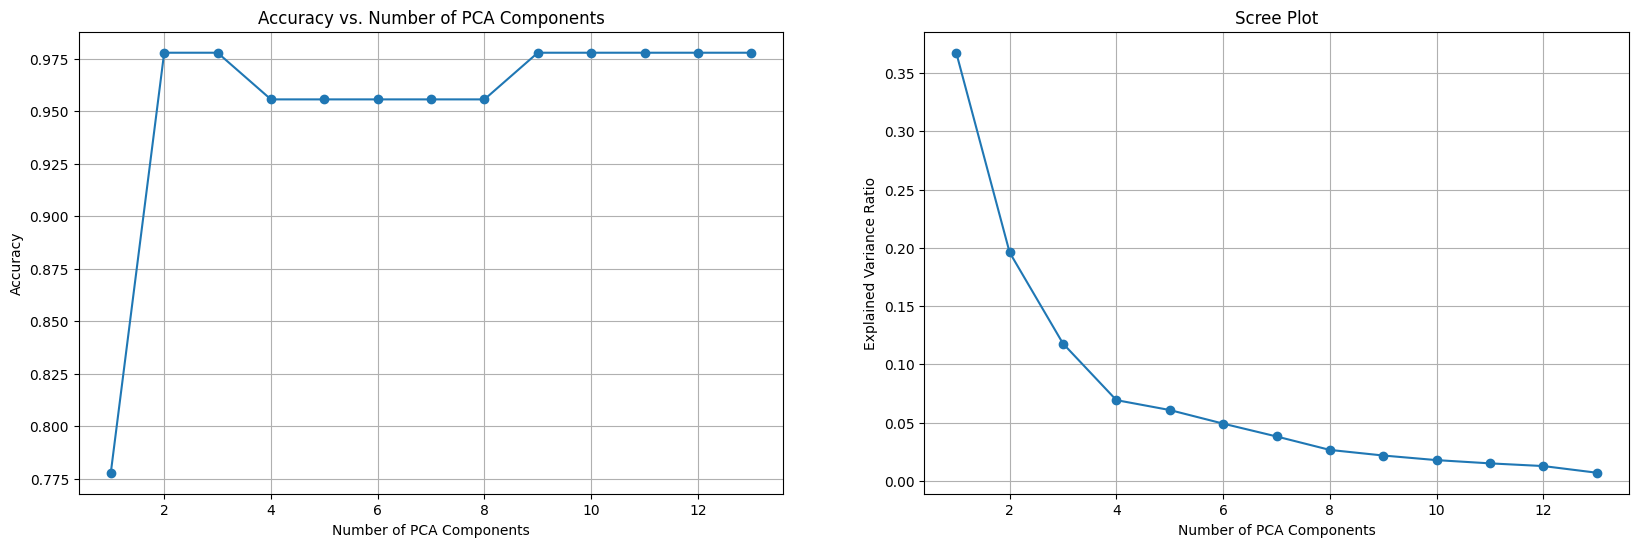

In [34]:
import matplotlib.pyplot as plt

# Initialize an empty list to store accuracy for each number of components
accuracy_scores = []
solver = "lbfgs"
# Loop over number of components from 1 to 13
for i in range(1, 14):
    pca = PCA(n_components=i).fit(X_train_)
    Z_train = pca.transform(X_train_)
    Z_test = pca.transform(X_test_)
    clf_PCA = LogisticRegression(solver=solver, **opts)
    clf_PCA.fit(Z_train, y_train)
    y_pred = clf_PCA.predict(Z_test)
    accuracy = clf_PCA.score(Z_test, y_test)
    accuracy_scores.append(accuracy)

# Create a figure and a grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot the accuracy scores on the first subplot
ax1.plot(range(1, 14), accuracy_scores, marker='o', linestyle='-')
ax1.set_title('Accuracy vs. Number of PCA Components')
ax1.set_xlabel('Number of PCA Components')
ax1.set_ylabel('Accuracy')
ax1.grid(True)

# Fit PCA on the training data
pca = PCA().fit(X_train_)

# Calculate explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio on the second subplot
ax2.plot(range(1, 14), explained_variance_ratio, marker='o', linestyle='-')
ax2.set_title('Scree Plot')
ax2.set_xlabel('Number of PCA Components')
ax2.set_ylabel('Explained Variance Ratio')
ax2.grid(True)

# Display the figure with the two subplots
plt.show()

結果說明 :
1. 從 Scree Plot 來看，將主成分逐漸調高，Explained Variance Ratio隨之降低。
2. 從左圖來看，只採用第一個主成分時，測試資料之準確率大約等於78%，採用前兩個主成分時，測試資料之準確率大約等於0.97%，隨著主成分逐漸調高，測試資料之準確率大約都維持在95%到98%的區間。
3. 以上說明採用越多主成分，Explained Variance Ratio隨之降低，測試資料之準確率隨之提升。

### (3)比較LogisticRegressionCV 的表現是否優於 LogisticRegression

程式碼說明:
1. 訓練和評估LogisticRegressionCV模型
2. 訓練和評估LogisticRegression模型
3. 比較兩種模型的性能
4. 參數設定: solver(lbfgs)、Cs = np.logspace(−5, 5, 20)

In [114]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report

opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1) 
solver = "lbfgs"
Cs = np.logspace(-5, 5, 20)

# Train and evaluate LogisticRegressionCV
clf_cv = LogisticRegressionCV(solver = solver, Cs=Cs, **opts)
clf_cv.fit(X_train_, y_train)
y_pred_cv = clf_cv.predict(X_test_)
print("Performance of LogisticRegressionCV:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_cv):.2%}")
print(f"Score: {clf_cv.score(X_test_, y_test):.2%}")
print(classification_report(y_test, y_pred_cv))

# Train and evaluate LogisticRegression
clf = LogisticRegression(solver = solver, **opts)
clf.fit(X_train_, y_train)
y_pred = clf.predict(X_test_)
print("\nPerformance of LogisticRegression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(f"Score: {clf.score(X_test_, y_test):.2%}")
print(classification_report(y_test, y_pred))

Performance of LogisticRegressionCV:
Accuracy: 97.78%
Score: 97.78%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.95      0.98        22
           3       0.91      1.00      0.95        10

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


Performance of LogisticRegression:
Accuracy: 97.78%
Score: 97.78%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.95      0.98        22
           3       0.91      1.00      0.95        10

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



結果說明 :

在這solver設定為lbfgs的狀況下，LogisticRegressionCV 的表現與 LogisticRegression 一樣，準確率皆為 97.78%，但LogisticRegressionCV進行了交叉驗證，並且可以自動找到最佳的正則化參數C，所以在不同的狀況下，LogisticRegressionCV可能會比LogisticRegression表現得更好。

## (三)SVM 分群

### (1)以標準化後之原始資料的訓練資料學習，並以測試資料測試準確率

程式碼說明:
1. 定義train_and_evaluate函數
2. 訓練分類器
3. 設定SVM分類器的參數(C = C, tol = 1e-6, max_iter = int(1e6))
4. 設定使用不同的kernel

In [117]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC, LinearSVC

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    # Fit the classifier with the data
    clf.fit(X_train, y_train)

    # Predict the labels of the test data
    predictions = clf.predict(X_test)

    # Calculate and print the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    print(f"Accuracy Score: {acc_score:.2%}")

    # Print the classification report
    print(classification_report(y_test, predictions, zero_division=1))

# Define the SVM classifier
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))

kernel(linear)

In [118]:
clf_svm = SVC(kernel="linear", **opts)
train_and_evaluate(clf_svm, X_train, X_test, y_train, y_test)

Accuracy Score: 95.56%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.91      0.95        22
           3       0.83      1.00      0.91        10

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



c:\Users\wesley\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


結果說明 :
1. 測試資料之準確率95.56%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數都為0.96，這表示模型在每個類別的預測性能很好。

kernel(rbf)

In [119]:
clf_svm = SVC(kernel="rbf", gamma=0.2, **opts)
train_and_evaluate(clf_svm, X_train, X_test, y_train, y_test)

Accuracy Score: 48.89%
              precision    recall  f1-score   support

           1       1.00      0.00      0.00        13
           2       0.49      1.00      0.66        22
           3       1.00      0.00      0.00        10

    accuracy                           0.49        45
   macro avg       0.83      0.33      0.22        45
weighted avg       0.75      0.49      0.32        45



結果說明 :
1. 測試資料之準確率48.89%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數都為分別為 0.75、0.49、0.32。

kernel(poly)

In [120]:
clf_svm = SVC(kernel="poly", degree=3, gamma="auto", **opts)
train_and_evaluate(clf_svm, X_train, X_test, y_train, y_test)

Accuracy Score: 91.11%
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        13
           2       1.00      0.86      0.93        22
           3       0.77      1.00      0.87        10

    accuracy                           0.91        45
   macro avg       0.90      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



c:\Users\wesley\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


結果說明 :
1. 測試資料之準確率91.11%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.93、0.91、0.91，這表示模型在每個類別的預測性能很好。

kernel(LinearSVC : "one-vs-rest")

In [44]:
clf_svm = LinearSVC(**opts) # one vs the rest
train_and_evaluate(clf_svm, X_train, X_test, y_train, y_test)

c:\Users\wesley\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy Score: 86.67%
              precision    recall  f1-score   support

           1       0.76      1.00      0.87        13
           2       1.00      0.73      0.84        22
           3       0.83      1.00      0.91        10

    accuracy                           0.87        45
   macro avg       0.87      0.91      0.87        45
weighted avg       0.89      0.87      0.86        45



c:\Users\wesley\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


結果說明 :
1. 測試資料之準確率86.67%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.89、0.87、0.86，這表示模型在每個類別的預測性能還可以。

### 使用網格搜索（GridSearchCV）來尋找最佳的參數組合


程式碼說明:
1. 設定參數網格
2. 進行網格搜索(GridSearchCV)
3. 輸出最佳參數：網格搜索完成後，輸出找到的最佳參數組合
4. 預測並評估模型：使用訓練好的模型對測試數據進行預測，並輸出模型在測試數據上的準確度和分類報告

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'tol': [1e-3, 1e-4, 1e-5, 1e-6],
    'max_iter': [int(1e3), int(1e4), int(1e5), int(1e6)]
}

# Define the classifiers
classifiers = {
    'SVC_linear': SVC(kernel='linear', max_iter=int(1e6)),
    'SVC_rbf': SVC(kernel='rbf', max_iter=int(1e6)),
    'SVC_poly': SVC(kernel='poly', max_iter=int(1e6)),
    'LinearSVC': LinearSVC(max_iter=int(1e6), dual=False)
}

# Initialize the best accuracy and classifier
best_accuracy = 0
best_classifier = None
best_params = None
best_report = None

# For each classifier
for name, clf in classifiers.items():
    # Define the GridSearchCV
    clf_gs = GridSearchCV(clf, param_grid, verbose=1, cv=3, n_jobs=-1)

    # Train the model
    clf_gs.fit(X_train, y_train)

    # Predict the test data
    y_pred = clf_gs.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # If the accuracy is better than the current best, update the best accuracy, classifier, parameters, and report
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = name
        best_params = clf_gs.best_params_
        best_report = classification_report(y_test, y_pred)

# Print the best results
print(f"Best Classifier: {best_classifier}")
print(f"Best Parameters: ", best_params)
print(f"Best Accuracy: {best_accuracy:.2%}\n")
print(f"Classification Report for {best_classifier}:\n", best_report)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


c:\Users\wesley\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Fitting 3 folds for each of 64 candidates, totalling 192 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Classifier: SVC_linear
Best Parameters:  {'C': 0.1, 'max_iter': 100000, 'tol': 1e-06}
Best Accuracy: 95.56%

Classification Report for SVC_linear:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.91      0.95        22
           3       0.83      1.00      0.91        10

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



結果說明 :

四種kernel表現最好的是SVC_linear，參數設定是('C': 0.1, 'max_iter': 100000, 'tol': 1e-06)，測試資料之準確率達到95.56%。

### (2)以標準化後之原始資料的主成分之訓練資料學習，並以測試資料測試準確率

程式碼說明 :
1. 使用 PCA 對訓練數據 X_train_ 進行擬合，並將其降維到兩個主成分。
2. 使用訓練好的 PCA 模型將訓練數據和測試數據轉換到新的低維空間，得到 Z_train 和 Z_test。
3. 定義SVM分類器。設置SVM的正則化參數C為1，並將其與其他參數一起存儲在opts中。
4. 使用PCA轉換後的訓練數據Z_train和對應的標籤y_train來訓練SVM分類器。
5. 輸出模型的分類報告。

In [61]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

def train_and_evaluate(clf_svm, X_train_, X_test_, y_train, y_test):
    # Apply PCA to the training data and transform it
    pca = PCA(n_components = 2).fit(X_train_)
    Z_train = pca.transform(X_train_)
    Z_test = pca.transform(X_test_)

    # Fit the SVM classifier with the PCA transformed data
    clf_svm.fit(Z_train, y_train)

    # Predict the labels of the PCA transformed test data
    predictions = clf_svm.predict(Z_test)

    # Calculate and print the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    print(f"Accuracy Score: {acc_score:.2%}")

    # Print the classification report
    print(classification_report(y_test, predictions))

# Define the SVM classifier
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))


kernel(linear)

In [62]:
clf_svm = SVC(kernel="linear", **opts)
train_and_evaluate(clf_svm, X_train_, X_test_, y_train, y_test)

Accuracy Score: 97.78%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.95      0.98        22
           3       0.91      1.00      0.95        10

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



結果說明 :
1. 測試資料之準確率97.78%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.98、0.98、0.98，這表示模型在每個類別的預測性能很好。

kernel(rbf)

In [63]:
clf_svm = SVC(kernel="rbf", gamma=0.2, **opts)
train_and_evaluate(clf_svm, X_train_, X_test_, y_train, y_test)

Accuracy Score: 95.56%
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      0.91      0.95        22
           3       0.91      1.00      0.95        10

    accuracy                           0.96        45
   macro avg       0.95      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45



結果說明 :
1. 測試資料之準確率95.56%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.96、0.96、0.96，這表示模型在每個類別的預測性能很好。

kernel(poly)

In [64]:
clf_svm = SVC(kernel="poly", degree=3, gamma="auto", **opts)
train_and_evaluate(clf_svm, X_train_, X_test_, y_train, y_test)

Accuracy Score: 91.11%
              precision    recall  f1-score   support

           1       0.81      1.00      0.90        13
           2       1.00      0.82      0.90        22
           3       0.91      1.00      0.95        10

    accuracy                           0.91        45
   macro avg       0.91      0.94      0.92        45
weighted avg       0.93      0.91      0.91        45



結果說明 :
1. 測試資料之準確率91.11%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.93、0.91、0.91，這表示模型在每個類別的預測性能還不錯。

kernel(LinearSVC : "one-vs-rest")

In [65]:
clf_svm = LinearSVC(**opts) # one vs the rest
train_and_evaluate(clf_svm, X_train_, X_test_, y_train, y_test)

Accuracy Score: 97.78%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.95      0.98        22
           3       0.91      1.00      0.95        10

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



c:\Users\wesley\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


結果說明 :
1. 測試資料之準確率97.78%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.98、0.98、0.98，這表示模型在每個類別的預測性能很好。

### 使用網格搜索（GridSearchCV）來尋找最佳的參數組合

程式碼說明:
1. 設定參數網格
2. 進行網格搜索(GridSearchCV)
3. 輸出最佳參數：網格搜索完成後，輸出找到的最佳參數組合
4. 預測並評估模型：使用訓練好的模型對測試數據進行預測，並輸出模型在測試數據上的準確度和分類報告

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC

def train_and_evaluate(X_train_, X_test_, y_train, y_test):
    # Apply PCA to the training data and transform it
    pca = PCA(n_components = 2).fit(X_train_)
    Z_train = pca.transform(X_train_)
    Z_test = pca.transform(X_test_)

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'tol': [1e-3, 1e-4, 1e-5, 1e-6],
        'max_iter': [int(1e3), int(1e4), int(1e5), int(1e6)]
    }

    # Define the classifiers
    classifiers = {
        'SVC_linear': SVC(kernel='linear', max_iter=int(1e6)),
        'SVC_rbf': SVC(kernel='rbf', max_iter=int(1e6)),
        'SVC_poly': SVC(kernel='poly', max_iter=int(1e6)),
        'LinearSVC': LinearSVC(max_iter=int(1e6), dual=False)
    }

    # Initialize the best accuracy and classifier
    best_accuracy = 0
    best_classifier = None
    best_params = None
    best_report = None

    # For each classifier
    for name, clf in classifiers.items():
        # Define the GridSearchCV
        clf_gs = GridSearchCV(clf, param_grid, verbose=1, cv=3, n_jobs=-1)

        # Fit the classifier with the PCA transformed data
        clf_gs.fit(Z_train, y_train)

        # Predict the labels of the PCA transformed test data
        predictions = clf_gs.predict(Z_test)

        # Calculate the accuracy score
        acc_score = accuracy_score(y_test, predictions)

        # If the accuracy is better than the current best, update the best accuracy, classifier, parameters, and report
        if acc_score > best_accuracy:
            best_accuracy = acc_score
            best_classifier = name
            best_params = clf_gs.best_params_
            best_report = classification_report(y_test, predictions)

    # Print the best classifier, parameters and accuracy
    print(f"Best Classifier: {best_classifier}")
    print(f"Best Parameters: ", best_params)
    print(f"Best Accuracy: {best_accuracy:.2%}\n")
    print(f"Classification Report for {best_classifier}:\n", best_report)
train_and_evaluate(X_train_, X_test_, y_train, y_test)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


c:\Users\wesley\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Fitting 3 folds for each of 64 candidates, totalling 192 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Classifier: SVC_linear
Best Parameters:  {'C': 10, 'max_iter': 1000, 'tol': 0.001}
Best Accuracy: 97.78%

Classification Report for SVC_linear:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.95      0.98        22
           3       0.91      1.00      0.95        10

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



結果說明 :

三種演算法表現最好的是SVC_linear，參數設定是('C': 10, 'max_iter': 1000, 'tol': 0.001)，測試資料之準確率達到97.78%。

將主成分逐漸調高（直到 13），觀察準確率的變化，並畫一張折線圖來比較（與 scree plot 對比）。
(選用linear kernel)

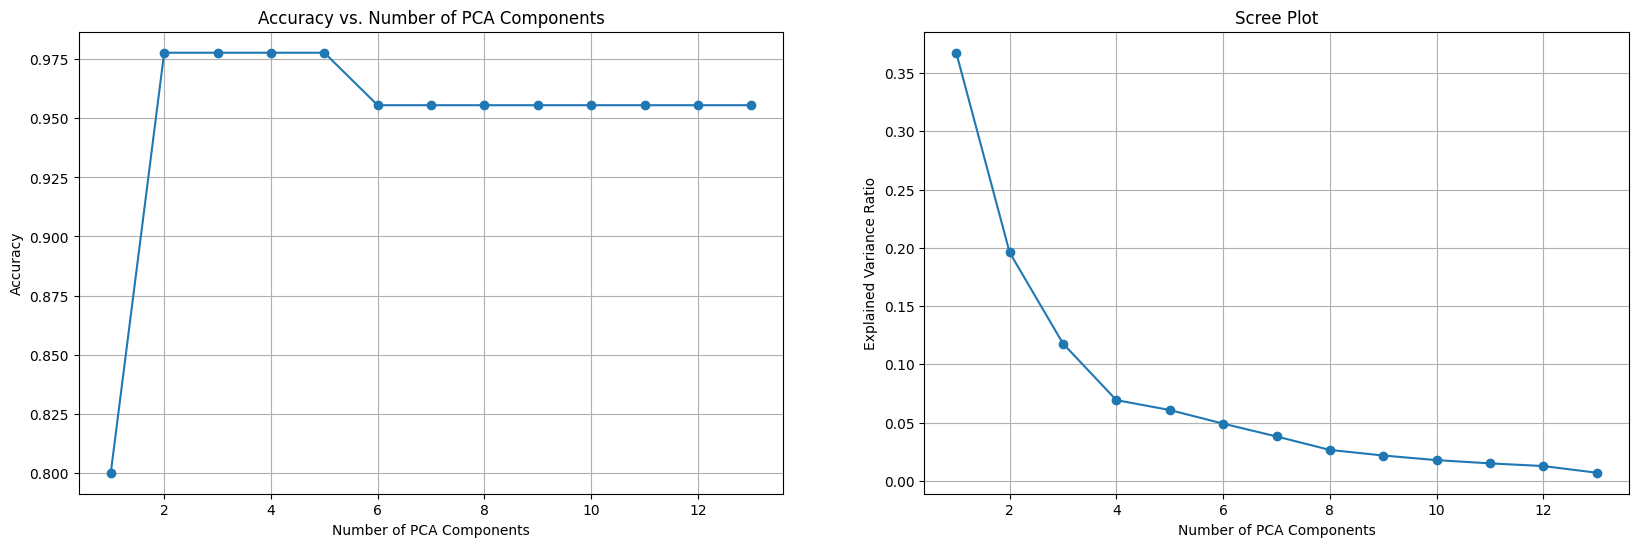

In [75]:
from sklearn.svm import SVC

# Initialize an empty list to store accuracy for each number of components
accuracy_scores = []
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))

# Loop over number of components from 1 to 13
for i in range(1, 14):
    pca = PCA(n_components=i).fit(X_train_)
    Z_train = pca.transform(X_train_)
    Z_test = pca.transform(X_test_)
    clf_PCA = SVC(kernel="linear", **opts)
    clf_PCA.fit(Z_train, y_train)
    y_pred = clf_PCA.predict(Z_test)
    accuracy = clf_PCA.score(Z_test, y_test)
    accuracy_scores.append(accuracy)

# Create a figure and a grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot the accuracy scores on the first subplot
ax1.plot(range(1, 14), accuracy_scores, marker='o', linestyle='-')
ax1.set_title('Accuracy vs. Number of PCA Components')
ax1.set_xlabel('Number of PCA Components')
ax1.set_ylabel('Accuracy')
ax1.grid(True)

# Fit PCA on the training data
pca = PCA().fit(X_train_)

# Calculate explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio on the second subplot
ax2.plot(range(1, 14), explained_variance_ratio, marker='o', linestyle='-')
ax2.set_title('Scree Plot')
ax2.set_xlabel('Number of PCA Components')
ax2.set_ylabel('Explained Variance Ratio')
ax2.grid(True)

# Display the figure with the two subplots
plt.show()

結果說明 :
1. 從 Scree Plot 來看，將主成分逐漸調高，Explained Variance Ratio隨之降低。
2. 從左圖來看，只採用第一個主成分時，測試資料之準確率大約等於80%，採用前兩個主成分時，測試資料之準確率大約等於97%，隨著主成分逐漸調高，測試資料之準確率大約都維持在95%到97%的區間。
3. 但增加到保留六個主成分時，準確率卻降低到大約95%，有可能是因為過度依賴主成分（即使用過多的主成分），可能導致模型過擬合才造成這個結果。
3. 以上說明採用越多主成分，Explained Variance Ratio隨之降低，測試資料之準確率隨之提升。

## (四)神經網路（Neural Network）

(1)以標準化後之原始資料的訓練資料學習，並以測試資料測試準確率

程式碼說明:
1. 定義並訓練 MLP 分類器
2. 進行預測，將預測結果存儲在 predictions 變量中
3. 評估模型，使用 classification_report 函數來生成一個分類報告
4. 設定使用不同演算法

In [122]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

def train_MLP(solver, X_train, y_train, X_test, y_test):
    hidden_layers = (30,)
    activation = "logistic"
    opts = dict(hidden_layer_sizes = hidden_layers , verbose = False, \
    activation = activation, tol = 1e-6, max_iter = int(1e6))

    clf_MLP = MLPClassifier(solver = solver, **opts)
    clf_MLP.fit(X_train, y_train)
    predictions = clf_MLP.predict(X_test)
    print(classification_report(y_test, predictions, zero_division=1))

演算法(adam)

In [123]:
# 使用函數訓練模型
train_MLP("adam", X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           1       0.76      1.00      0.87        13
           2       1.00      0.73      0.84        22
           3       0.83      1.00      0.91        10

    accuracy                           0.87        45
   macro avg       0.87      0.91      0.87        45
weighted avg       0.89      0.87      0.86        45



結果說明 :
1. 測試資料之準確率87%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.89、0.87、0.86，這表示模型在每個類別的預測性能還行。

演算法(sgd)

In [124]:
train_MLP("sgd", X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           1       0.91      0.77      0.83        13
           2       0.62      0.95      0.75        22
           3       1.00      0.00      0.00        10

    accuracy                           0.69        45
   macro avg       0.84      0.57      0.53        45
weighted avg       0.79      0.69      0.61        45



結果說明 :
1. 測試資料之準確率69%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.79、0.69、0.61，這表示模型在每個類別的預測性能不太好。

演算法(lbfgs)

In [125]:
train_MLP("lbfgs", X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           1       0.86      0.92      0.89        13
           2       0.95      0.82      0.88        22
           3       0.83      1.00      0.91        10

    accuracy                           0.89        45
   macro avg       0.88      0.91      0.89        45
weighted avg       0.90      0.89      0.89        45



結果說明 :
1. 測試資料之準確率89%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.90、0.89、0.89，這表示模型在每個類別的預測性能還不錯。

### 使用網格搜索（GridSearchCV）來尋找最佳的參數組合


程式碼說明:
1. 設定參數網格
2. 進行網格搜索(GridSearchCV)
3. 輸出最佳參數：網格搜索完成後，輸出找到的最佳參數組合
4. 預測並評估模型：使用訓練好的模型對測試數據進行預測，並輸出模型在測試數據上的準確度和分類報告

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

def train_and_evaluate(X_train, X_test, y_train, y_test):
    # Define the parameter grid for GridSearchCV
    param_grid = {
        'hidden_layer_sizes': [(30,), (50,), (100,)],
        'activation': ['logistic', 'relu'],
        'solver': ['adam', 'sgd', 'lbfgs'],
        'tol': [1e-3, 1e-4, 1e-5, 1e-6],
        'max_iter': [int(1e3), int(1e4), int(1e5), int(1e6)]
    }

    # Define the MLP classifier
    clf_MLP = MLPClassifier()

    # Define the GridSearchCV
    clf_gs = GridSearchCV(clf_MLP, param_grid, verbose=1, cv=3, n_jobs=-1)

    # Fit the classifier with the data
    clf_gs.fit(X_train, y_train)

    # Predict the labels of the test data
    predictions = clf_gs.predict(X_test)

    # Calculate and print the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    print(f"Accuracy Score: {acc_score:.2%}")

    # Print the best parameters
    print("Best Parameters: ", clf_gs.best_params_)

    # Print the classification report
    print(classification_report(y_test, predictions))

# Call the function
train_and_evaluate(X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Accuracy Score: 91.11%
Best Parameters:  {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 100000, 'solver': 'adam', 'tol': 0.001}
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        13
           2       0.91      0.91      0.91        22
           3       0.90      0.90      0.90        10

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45




結果說明 :

三種演算法表現最好的是adam，參數設定是('activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 100000, 'solver': 'adam', 'tol': 0.001)，測試資料之準確率達到91.11%。

### (2)以標準化後之原始資料的主成分之訓練資料學習，並以測試資料測試準確率

程式碼說明:
1. 定義並訓練 MLP 分類器
2. 進行預測，將預測結果存儲在 predictions 變量中
3. 設定保留前兩個主成分
4. 評估模型，使用 classification_report 函數來生成一個分類報告
5. 設定使用不同演算法

In [129]:
def train_MLP_with_PCA(solver, X_train, y_train, X_test, y_test):
    # Define the PCA transformer
    pca = PCA(n_components=2)

    # Apply PCA to the training data and transform it
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    hidden_layers = (100, 220, )
    activation = "logistic"
    opts = dict(hidden_layer_sizes = hidden_layers , verbose = False, \
    activation = activation, tol = 1e-6, max_iter = int(1e6))  # Increase max_iter

    clf_MLP = MLPClassifier(solver = solver, **opts)
    clf_MLP.fit(X_train_pca, y_train)
    predictions = clf_MLP.predict(X_test_pca)
    print(classification_report(y_test, predictions))

In [106]:
# 使用函數訓練模型
train_MLP_with_PCA("adam", X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           1       0.85      0.85      0.85        13
           2       0.80      0.73      0.76        22
           3       0.42      0.50      0.45        10

    accuracy                           0.71        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.71      0.72        45



結果說明 :
1. 測試資料之準確率71%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.73、0.71、0.72，這表示模型在每個類別的預測性能有待加強。

In [107]:
# 使用函數訓練模型
train_MLP_with_PCA("sgd", X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           1       0.85      0.85      0.85        13
           2       0.70      0.64      0.67        22
           3       0.25      0.30      0.27        10

    accuracy                           0.62        45
   macro avg       0.60      0.59      0.60        45
weighted avg       0.64      0.62      0.63        45



結果說明 :
1. 測試資料之準確率62%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.64、0.62、0.63，這表示模型在每個類別的預測性能。

In [127]:
# 使用函數訓練模型
train_MLP_with_PCA("lbfgs", X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           1       0.85      0.85      0.85        13
           2       0.83      0.68      0.75        22
           3       0.43      0.60      0.50        10

    accuracy                           0.71        45
   macro avg       0.70      0.71      0.70        45
weighted avg       0.75      0.71      0.72        45



c:\Users\wesley\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


結果說明 :
1. 測試資料之準確率71%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.75、0.71、0.72，這表示模型在每個類別的預測性能。

### 使用網格搜索（GridSearchCV）來尋找最佳的參數組合

程式碼說明:
1. 設定參數網格
2. 進行網格搜索(GridSearchCV)
3. 輸出最佳參數：網格搜索完成後，輸出找到的最佳參數組合
4. 預測並評估模型：使用訓練好的模型對測試數據進行預測，並輸出模型在測試數據上的準確度和分類報告

In [130]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

def train_and_evaluate(X_train, X_test, y_train, y_test):
    # Define the PCA transformer
    pca = PCA(n_components=2)

    # Apply PCA to the training data and transform it
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'hidden_layer_sizes': [(30,), (50,), (100,)],
        'activation': ['logistic', 'relu'],
        'solver': ['adam', 'sgd', 'lbfgs'],
        'tol': [1e-3, 1e-4, 1e-5, 1e-6],
        'max_iter': [int(1e3), int(1e4), int(1e5), int(1e6)]
    }

    # Define the MLP classifier
    clf_MLP = MLPClassifier()

    # Define the GridSearchCV
    clf_gs = GridSearchCV(clf_MLP, param_grid, verbose=1, cv=3, n_jobs=-1)

    # Fit the classifier with the PCA-transformed data
    clf_gs.fit(X_train_pca, y_train)

    # Predict the labels of the PCA-transformed test data
    predictions = clf_gs.predict(X_test_pca)

    # Calculate and print the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    print(f"Accuracy Score: {acc_score:.2%}")

    # Print the best parameters
    print("Best Parameters: ", clf_gs.best_params_)

    # Print the classification report
    print(classification_report(y_test, predictions))

# Call the function
train_and_evaluate(X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Accuracy Score: 71.11%
Best Parameters:  {'activation': 'relu', 'hidden_layer_sizes': (50,), 'max_iter': 10000, 'solver': 'lbfgs', 'tol': 1e-06}
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        13
           2       0.80      0.73      0.76        22
           3       0.42      0.50      0.45        10

    accuracy                           0.71        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.71      0.72        45




結果說明 :

演算法表現最好的是lbfgs，參數設定是(activation': 'relu', 'hidden_layer_sizes': (50,), 'max_iter': 10000, 'solver': 'lbfgs', 'tol': 1e-06)，測試資料之準確率達到71%。

### <font color=blue>對兩種資料型態與三個分類器的表現做比較</font>

多元羅吉斯回歸 (Multinomial Logistic Regression)

1. 原始資料 : accuracy大約98%
2. 主成分資料(取前2個) : accuracy大約98%

支援向量機 (Support Vector Machine)

1. 原始資料 : accuracy大約96%
2. 主成分資料(取前2個) : accuracy大約98%

神經網路 (Neural Network)

1. 原始資料 : accuracy大約91%
2. 主成分資料(取前2個) : accuracy大約71%

結果: 
1. 在原始資料下，多元羅吉斯回歸的測試資料之準確率最高，達98%；再來是支援向量機，測試資料之準確率達96%。
2. 主成分資料(取前2個)下，多元羅吉斯回歸的測試資料與支援向量機之準確率並列最高，達98%；神經網路的測試資料之準確率只有71%，表現差強人意。

<font color=darkgoldenrod>個人見解</font> :

1. 模型選擇：多元羅吉斯回歸和支援向量機在這組資料上的表現優於神經網路，無論是在原始資料或主成分資料上。

2. 資料維度：神經網路在降維後的主成分資料上的表現明顯下降，可能是因為資訊損失或模型複雜度過高導致的。

3. 資料大小：由於這組資料較小，可能導致神經網路無法充分學習，而多元羅吉斯回歸和支援向量機作為較簡單的模型，則能在小型資料集上表現較好。